In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

def load_dataset():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    return pd.read_csv(file_name)

# Load data
data = load_dataset()


print("Dataset Shape:", data.shape)
print("\nFeature Names:")
print(data.columns.tolist())


# Display target variable distribution
print("\nTarget Variable Distribution:")
print(data['Electric Vehicle Type'].value_counts())

Saving ev_data_normalized.csv to ev_data_normalized (1).csv
Dataset Shape: (220225, 13)

Feature Names:
['Model Year', 'Electric Range', 'Longitude', 'Latitude', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility', 'Legislative District']

Target Variable Distribution:
Electric Vehicle Type
0.0    174212
1.0     46013
Name: count, dtype: int64


([0, 1], [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

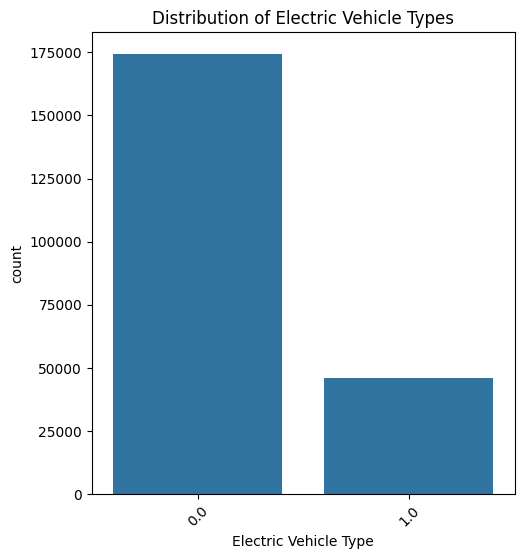

In [4]:
# Cell 3: Data Visualization
plt.figure(figsize=(12, 6))

# Target distribution plot
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)

# # Correlation heatmap
# plt.subplot(1, 2, 2)
# numeric_cols = data.select_dtypes(include=[np.number]).columns
# sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Feature Correlation Heatmap')
# plt.tight_layout()
# plt.show()

Model Performance Comparison:
     k     metric  accuracy
0    3  euclidean  0.997752
1    3  manhattan  0.998047
2    9  euclidean  0.996731
3    9  manhattan  0.997366
4  111  euclidean  0.993211
5  111  manhattan  0.995323


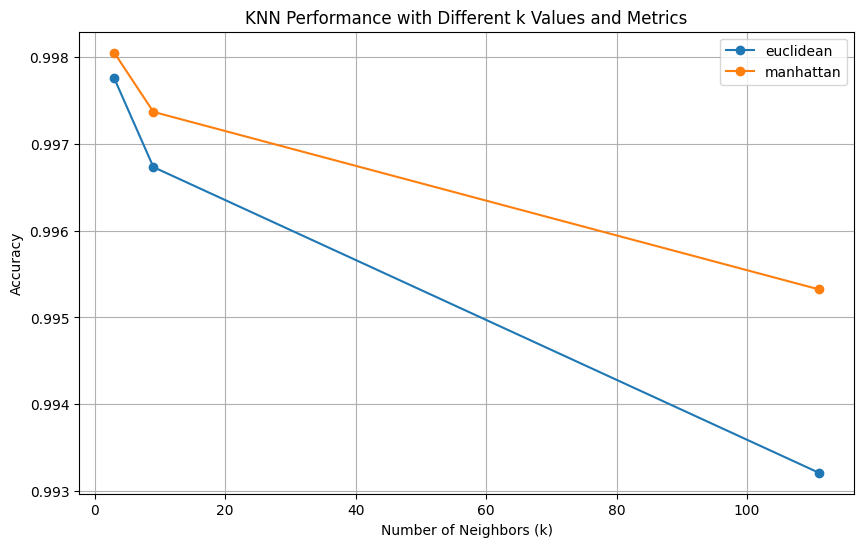

In [6]:

def prepare_data(df, target_column, test_size=0.2):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Compare different K values
k_values = [3, 9,111]
metrics = ['euclidean', 'manhattan']
results = []

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        X_train, X_test, y_train, y_test = prepare_data(data, "Electric Vehicle Type")
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'k': k, 'metric': metric, 'accuracy': accuracy})


results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)


plt.figure(figsize=(10, 6))
for metric in metrics:
    metric_results = results_df[results_df['metric'] == metric]
    plt.plot(metric_results['k'], metric_results['accuracy'], marker='o', label=metric)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance with Different k Values and Metrics')
plt.legend()
plt.grid(True)
plt.show()

Best parameters: k=3, metric=manhattan

Best Model Performance:
Accuracy: 0.9980474514700874

Classification Report:
              precision    recall  f1-score   support

         0.0  0.99939612 0.99813320 0.99876426     34819
         1.0  0.99298813 0.99772382 0.99535035      9226

    accuracy                      0.99804745     44045
   macro avg  0.99619213 0.99792851 0.99705730     44045
weighted avg  0.99805385 0.99804745 0.99804916     44045



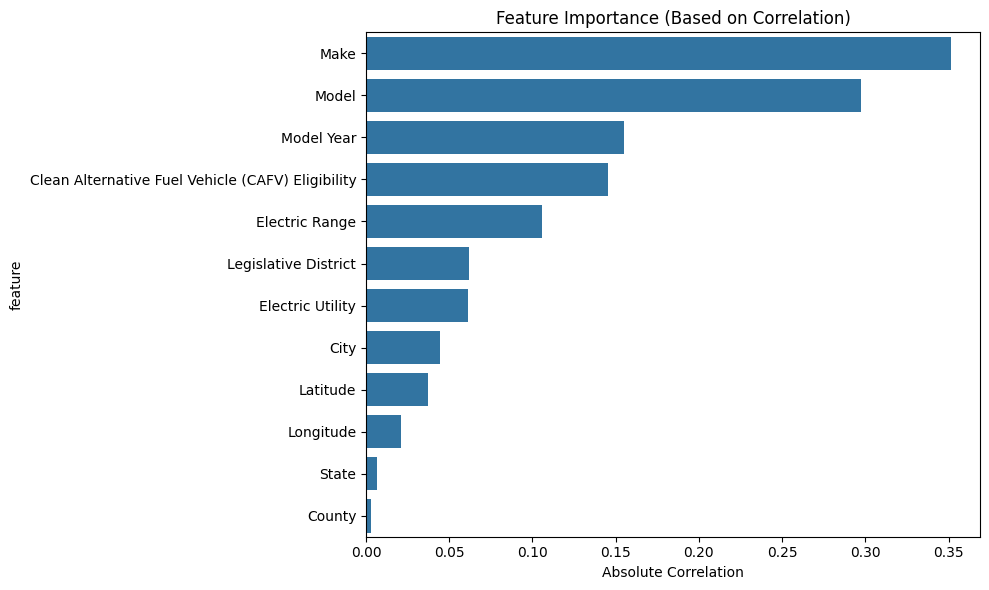

In [7]:

# Use the best performing k and metric from the comparison
best_k = results_df.loc[results_df['accuracy'].idxmax()]['k']
best_metric = results_df.loc[results_df['accuracy'].idxmax()]['metric']

print(f"Best parameters: k={best_k}, metric={best_metric}")

# Train final model with best parameters
X_train, X_test, y_train, y_test = prepare_data(data, "Electric Vehicle Type")
best_knn = KNeighborsClassifier(n_neighbors=int(best_k), metric=best_metric)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)


print("\nBest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred,digits=8))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(pd.DataFrame(X_train).corrwith(pd.Series(y_train)))
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Based on Correlation)')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

Class labels in the dataset: ['0.0', '1.0']

Detailed Model Performance Metrics:
  k    metric   accuracy precision_0.0 recall_0.0     f1_0.0 precision_1.0 recall_1.0     f1_1.0
  3 euclidean 0.99775230    0.99908004 0.99807576 0.99857765    0.99276536 0.99653154 0.99464489
  3 manhattan 0.99804745    0.99939612 0.99813320 0.99876426    0.99298813 0.99772382 0.99535035
  9 euclidean 0.99673062    0.99939511 0.99646745 0.99792913    0.98681389 0.99772382 0.99223887
  9 manhattan 0.99736633    0.99965445 0.99701313 0.99833204    0.98883881 0.99869933 0.99374461
111 euclidean 0.99321149    0.99942130 0.99198713 0.99569034    0.97058513 0.99783221 0.98402010
111 manhattan 0.99532297    0.99959585 0.99448577 0.99703426    0.97958316 0.99848255 0.98894257


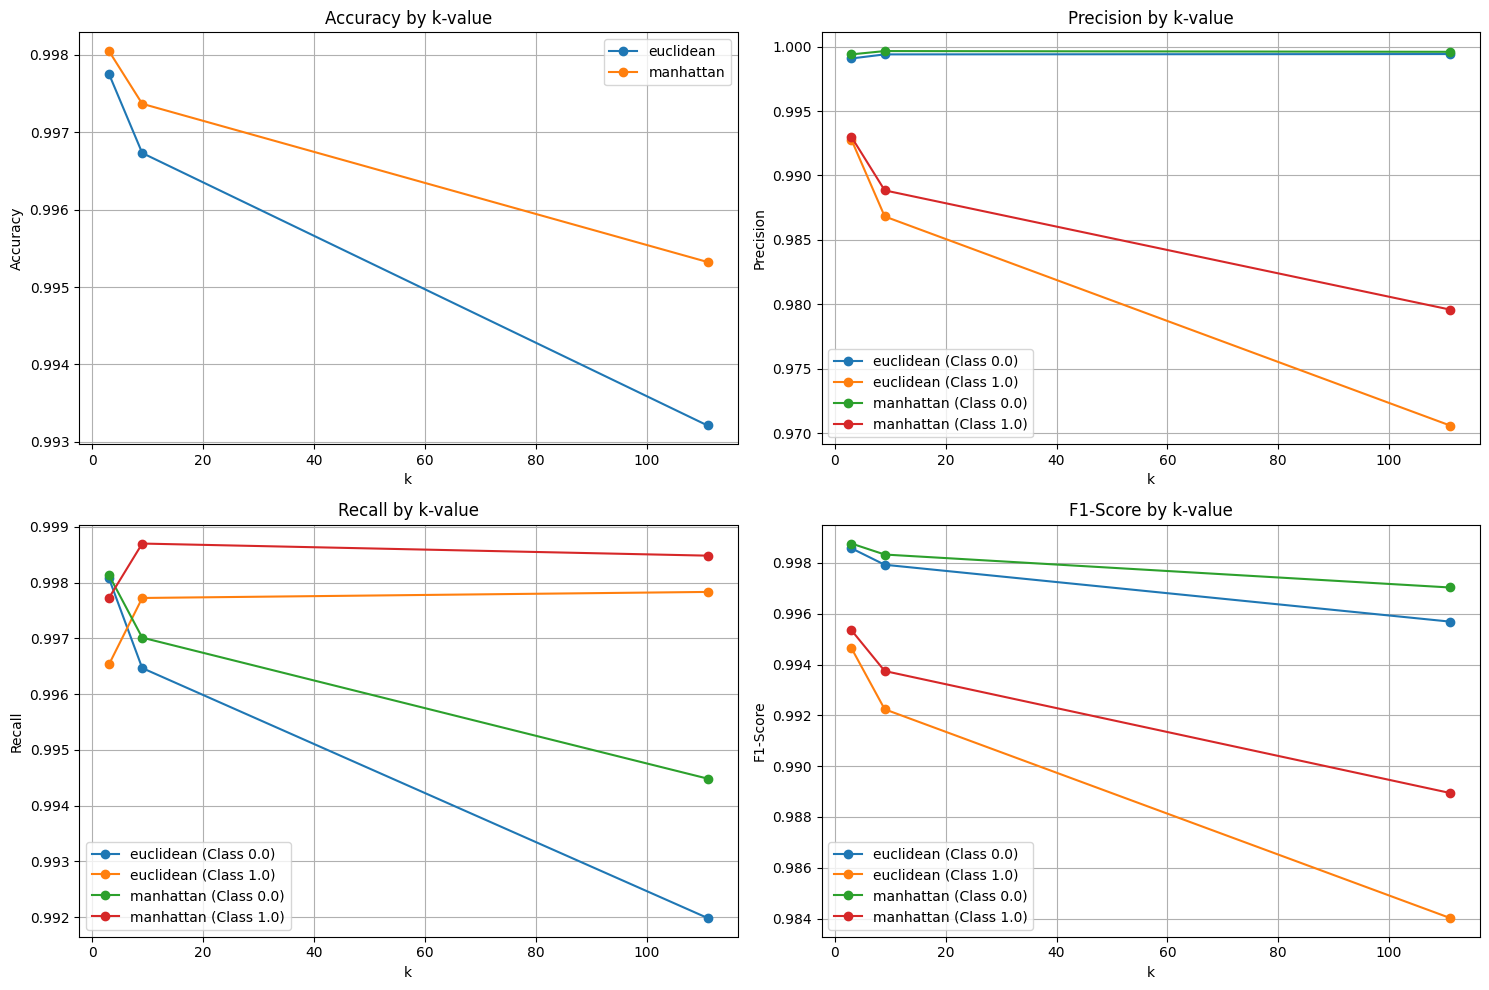

In [8]:
# Generate detailed metrics for each k value and metric
k_values = [3, 9,111]
metrics = ['euclidean', 'manhattan']
detailed_results = []

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        X_train, X_test, y_train, y_test = prepare_data(data, "Electric Vehicle Type")
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Get classification report as dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Print the report keys to see actual class labels
        class_labels = [label for label in report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

        # Store results
        result = {
            'k': k,
            'metric': metric,
            'accuracy': f"{report['accuracy']:.8f}"
        }

        for label in class_labels:
            result.update({
                f'precision_{label}': f"{report[label]['precision']:.8f}",
                f'recall_{label}': f"{report[label]['recall']:.8f}",
                f'f1_{label}': f"{report[label]['f1-score']:.8f}"
            })

        detailed_results.append(result)

# Convert to DataFrame for better display
results_df = pd.DataFrame(detailed_results)

# Print class labels found
print("Class labels in the dataset:", class_labels)

# Display the results
print("\nDetailed Model Performance Metrics:")
print(results_df.to_string(index=False))

# Create visualization
plt.figure(figsize=(15, 10))
for metric in metrics:
    metric_results = results_df[results_df['metric'] == metric]

    plt.subplot(2, 2, 1)
    plt.plot(metric_results['k'], metric_results['accuracy'].astype(float), marker='o', label=f'{metric}')
    plt.title('Accuracy by k-value')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    # Adjust these based on actual class labels
    for label in class_labels:
        plt.subplot(2, 2, 2)
        plt.plot(metric_results['k'], metric_results[f'precision_{label}'].astype(float),
                marker='o', label=f'{metric} (Class {label})')
        plt.title('Precision by k-value')
        plt.xlabel('k')
        plt.ylabel('Precision')
        plt.grid(True)
        plt.legend()

        plt.subplot(2, 2, 3)
        plt.plot(metric_results['k'], metric_results[f'recall_{label}'].astype(float),
                marker='o', label=f'{metric} (Class {label})')
        plt.title('Recall by k-value')
        plt.xlabel('k')
        plt.ylabel('Recall')
        plt.grid(True)
        plt.legend()

        plt.subplot(2, 2, 4)
        plt.plot(metric_results['k'], metric_results[f'f1_{label}'].astype(float),
                marker='o', label=f'{metric} (Class {label})')
        plt.title('F1-Score by k-value')
        plt.xlabel('k')
        plt.ylabel('F1-Score')
        plt.grid(True)
        plt.legend()

plt.tight_layout()
plt.show()